In [1]:
import datacube
import xarray as xr
import numpy as np

In [2]:
from dask.distributed import Client

client = Client("tcp://10.0.71.232:42885")
client

Client Scheduler: tcp://10.0.71.232:42885 Dashboard: /user/bra467/proxy/8787/status,Cluster Workers: 4 Cores: 32 Memory: 133.59 GB


In [3]:
dc = datacube.Datacube(app='dc-example')

In [4]:
dc.list_products()

,name,description,format,gqa_mean_xy,gqa_abs_xy,gqa_ref_source,gqa_stddev_xy,gqa_iterative_mean_xy,creation_time,lon,...,gqa,region_code,label,gqa_final_qa_count,gqa_abs_iterative_mean_xy,platform,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,,,,,,,
1,frac_cover,"Fractional cover with three bands - MODIS, CSI...",GeoTiff,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,None,NaN,NaN,MODIS MCD43A4,NaN,NaN,NaN,NaN
2,ga_s2a_ard_nbar_granule,Sentinel-2A MSI Definitive ARD - NBAR and Pixe...,GeoTIFF,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,None,NaN,NaN,SENTINEL_2A,NaN,NaN,NaN,NaN
3,ga_s2b_ard_nbar_granule,Sentinel-2B MSI Definitive ARD - NBAR and Pixe...,GeoTIFF,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,None,NaN,NaN,SENTINEL_2B,NaN,NaN,NaN,NaN


In [5]:
dc.list_measurements()

name    dtype  \
product                 measurement                                           
frac_cover              bare_soil                        bare_soil    uint8   
                        phot_veg                          phot_veg    uint8   
                        nphot_veg                        nphot_veg    uint8   
ga_s2a_ard_nbar_granule azimuthal_exiting        azimuthal_exiting  float32   
                        azimuthal_incident      azimuthal_incident  float32   
                        exiting                            exiting  float32   
                        incident                          incident  float32   
                        relative_azimuth          relative_azimuth  float32   
                        relative_slope              relative_slope  float32   
                        satellite_azimuth        satellite_azimuth  float32   
                        satellite_view              satellite_view  float32   
                        solar_azimuth                solar_azimuth  float32   
                        solar_zenith                  solar_zenith  float32   
                        terrain_shadow              terrain_shadow    uint8   
                        fmask                                fmask    uint8   
                        nbar_contiguity            nbar_contiguity    uint8   
                        nbar_coastal_aerosol  nbar_coastal_aerosol    int16   
                        nbar_blue                        nbar_blue    int16   
                        nbar_green                      nbar_green    int16   
                        nbar_red                          nbar_red    int16   
                        nbar_red_edge_1            nbar_red_edge_1    int16   
                        nbar_red_edge_2            nbar_red_edge_2    int16   
                        nbar_red_edge_3            nbar_red_edge_3    int16   
                        nbar_nir_1                      nbar_nir_1    int16   
                        nbar_nir_2                      nbar_nir_2    int16   
                        nbar_swir_2                    nbar_swir_2    int16   
                        nbar_swir_3                    nbar_swir_3    int16   
ga_s2b_ard_nbar_granule azimuthal_exiting        azimuthal_exiting  float32   
                        azimuthal_incident      azimuthal_incident  float32   
                        exiting                            exiting  float32   
                        incident                          incident  float32   
                        relative_azimuth          relative_azimuth  float32   
                        relative_slope              relative_slope  float32   
                        satellite_azimuth        satellite_azimuth  float32   
                        satellite_view              satellite_view  float32   
                        solar_azimuth                solar_azimuth  float32   
                        solar_zenith                  solar_zenith  float32   
                        terrain_shadow              terrain_shadow    uint8   
                        fmask                                fmask    uint8   
                        nbar_contiguity            nbar_contiguity    uint8   
                        nbar_coastal_aerosol  nbar_coastal_aerosol    int16   
                        nbar_blue                        nbar_blue    int16   
                        nbar_green                      nbar_green    int16   
                        nbar_red                          nbar_red    int16   
                        nbar_red_edge_1            nbar_red_edge_1    int16   
                        nbar_red_edge_2            nbar_red_edge_2    int16   
                        nbar_red_edge_3            nbar_red_edge_3    int16   
                        nbar_nir_1                      nbar_nir_1    int16   
                        nbar_nir_2                      nbar_nir_2    int16   
                        nbar_swir

In [6]:
# Set up a datacube query to load data for
# 
#         
query = {'x': (115.6887, 115.7545),
         'y': (-31.8818, -31.7551),
         'time': ('2018-02-01', '2018-03-01'),
         'measurements': ['nbar_red',
                          'nbar_green',
                          'nbar_blue',
                          'nbar_nir_1',
                          'nbar_swir_2',
                          'fmask'],
         'output_crs': 'EPSG:3577',
         'resolution': (-10, 10)}

# Load available data from both Sentinel 2 satellites
ds = dc.load(product=['ga_s2a_ard_nbar_granule', 'ga_s2b_ard_nbar_granule'],dask_chunks={'time':1},
              **query)

In [7]:
ds

<xarray.Dataset>
Dimensions:      (time: 6, x: 793, y: 1486)
Coordinates:
  * time         (time) datetime64[ns] 2018-02-01T02:19:21.026000 ... 2018-02...
  * y            (y) float64 -3.557e+06 -3.557e+06 ... -3.572e+06 -3.572e+06
  * x            (x) float64 -1.527e+06 -1.527e+06 ... -1.519e+06 -1.519e+06
    spatial_ref  int32 3577
Data variables:
    nbar_red     (time, y, x) int16 dask.array<chunksize=(1, 1486, 793), meta=np.ndarray>
    nbar_green   (time, y, x) int16 dask.array<chunksize=(1, 1486, 793), meta=np.ndarray>
    nbar_blue    (time, y, x) int16 dask.array<chunksize=(1, 1486, 793), meta=np.ndarray>
    nbar_nir_1   (time, y, x) int16 dask.array<chunksize=(1, 1486, 793), meta=np.ndarray>
    nbar_swir_2  (time, y, x) int16 dask.array<chunksize=(1, 1486, 793), meta=np.ndarray>
    fmask        (time, y, x) uint8 dask.array<chunksize=(1, 1486, 793), meta=np.ndarray>
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

In [8]:
print('Dataset size = %.3f MB' % (ds.nbytes/1E6))

Dataset size = 77.793 MB


In [9]:
ds = ds.load()

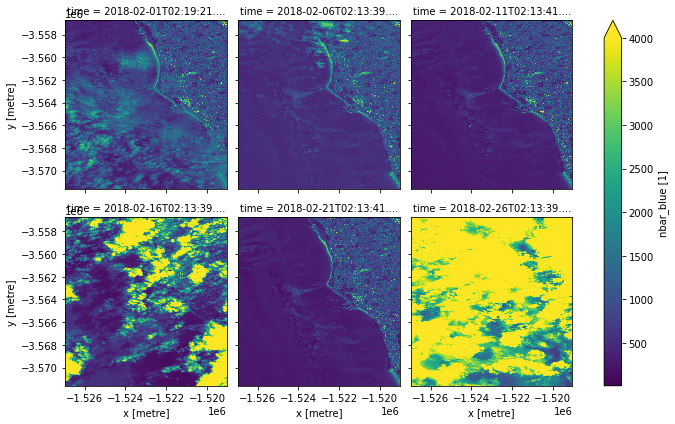

In [10]:
ds.nbar_blue.plot(col='time', col_wrap=3,vmax=4000)

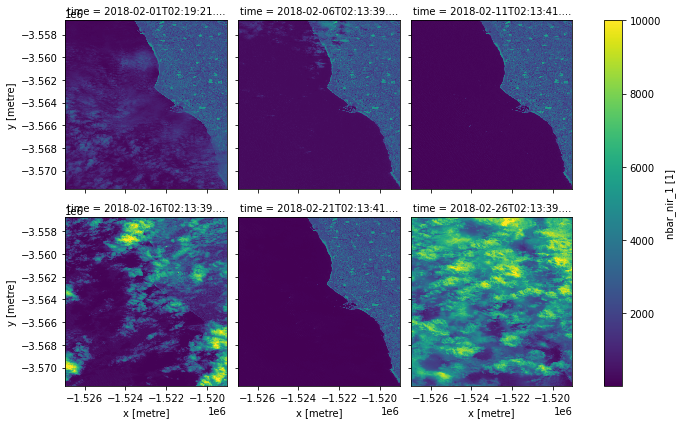

In [11]:
ds.nbar_nir_1.plot(col='time', col_wrap=3)

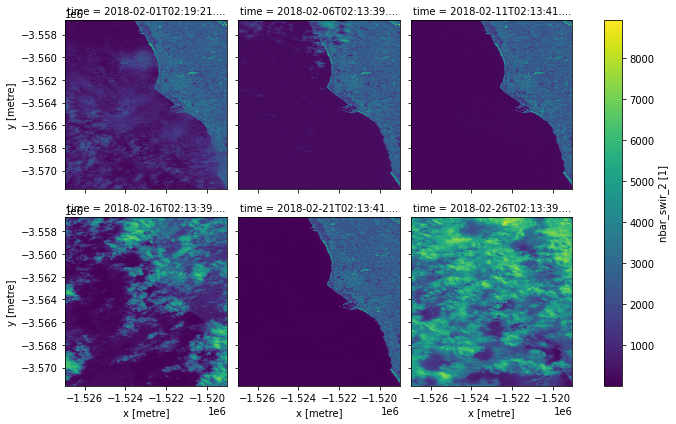

In [12]:
ds.nbar_swir_2.plot(col='time', col_wrap=3)

In [13]:
ds.fmask.attrs

{'units': '1',
 'nodata': 0,
 'flags_definition': {'fmask': {'bits': [0, 1, 2, 3, 4, 5, 6, 7],
   'values': {'0': 'nodata',
    '1': 'valid',
    '2': 'cloud',
    '3': 'shadow',
    '4': 'snow',
    '5': 'water'},
   'description': 'Fmask'}},
 'crs': 'EPSG:3577',
 'grid_mapping': 'spatial_ref'}

In [14]:
masked = ds.where((ds.fmask != 2) & (ds.fmask != 3),other=np.nan)

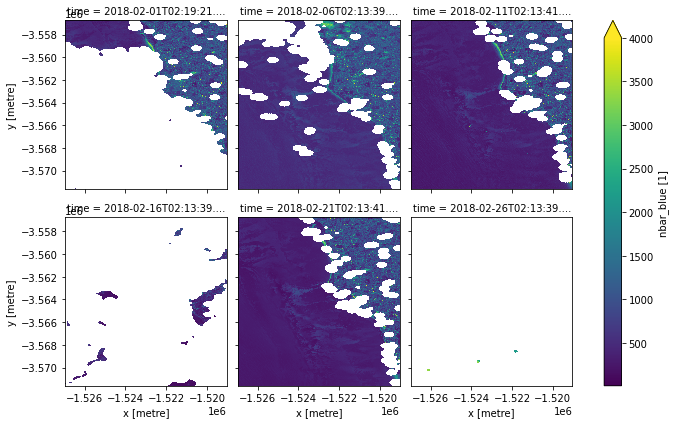

In [15]:
masked.nbar_blue.plot(col='time', col_wrap=3,vmax=4000)

### A better SWIR mask

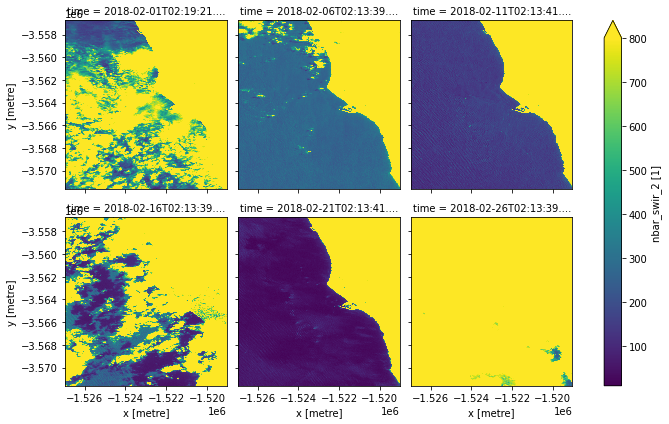

In [18]:
ds.nbar_swir_2.plot(col='time', col_wrap=3, vmax=800)

In [19]:
masked2 = ds.where(ds.nbar_swir_2 < 800,other=np.nan)

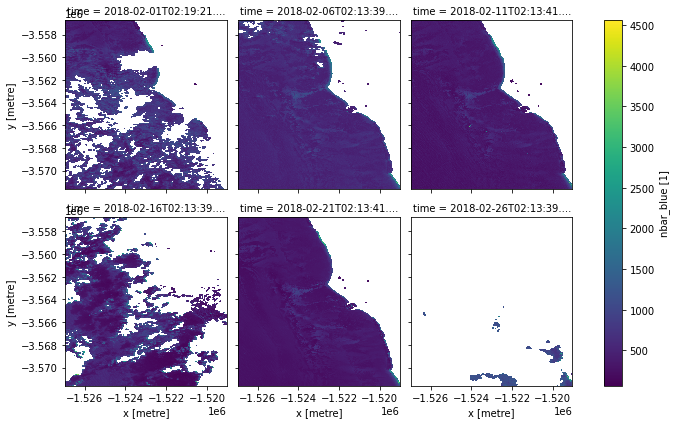

In [22]:
masked2.nbar_blue.plot(col='time', col_wrap=3)